# 🚗 Used Cars in Germany Analysis

---

## 🎯 Objective
Analyze the dataset to uncover **trends, patterns, and insights** about used car pricing and popularity.

---

## ❓ Business Questions

1. **💰 Resale Value:**  
   Which car brands and models retain the most value over time?

2. **📊 Price Factors:**  
   How do mileage, age, fuel type affect car prices?

3. **🔥 Popularity:**  
   What are the most popular cars price range?

# ---------------- German Version -----------------

# 🚗 Analyse von Gebrauchtwagen in Deutschland

---

## 🎯 Zielsetzung
Analyse des Datensatzes, um **Trends, Muster und Erkenntnisse** über Preise und Beliebtheit von Gebrauchtwagen zu gewinnen.

---

## ❓ Geschäftsfragen

1. **💰 Wiederverkaufswert:**  
   Welche Automarken und -modelle behalten im Laufe der Zeit den höchsten Wert?

2. **📊 Preisfaktoren:**  
   Wie wirken sich Kilometerstand, Alter, Kraftstoffart und Region auf die Preise aus?

3. **🔥 Beliebtheit:**  
   Welche Autos sind nach Region und Preiskategorie am beliebtesten?



## 📂 Dataset

The dataset was sourced from **Kaggle** and contains used car listings in Germany, originally scraped from the website **ImmoScout24**.  
It includes key information about each car, such as:

- **Brand** and **Model**
- **Year** of registration
- **Mileage** (in kilometers)
- **Horsepower (hp)**
- **Fuel type** (e.g., petrol, diesel, electric)
- **Transmission** (manual/automatic)
- **Price** (in Euros)

This dataset provides a rich basis for analyzing trends in used car prices, popularity by brand, and factors affecting resale value.

---

## 🛠️ Approach

Our analysis will follow a structured workflow to answer the business questions:

1. **Data Loading & Overview:**  
   Inspect the dataset, check data types, missing values, and initial statistics.

2. **Data Cleaning:**  
   Handle missing or inconsistent values, remove duplicates, and correct obvious outliers.

3. **Feature Engineering:**  
   Create new meaningful features such as car age, price per horsepower, and price per kilometer.

4. **Exploratory Data Analysis (EDA):**  
   Visualize distributions, relationships, and trends for both numerical and categorical features.

5. **Summary & Insights:**  
   Highlight key findings that answer the business questions and provide actionable insights for decision-making.


## 🛠️ Step 1a: Imports & Setup
Import necessary libraries, set random seeds for reproducibility, and configure plotting style.


In [1]:
# Standard libraries
import random
import numpy as np
import pandas as pd

# Setting seed so results are always reproducible
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a global style for plots
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style("whitegrid")


## 🛠️ Step 1b: Load Dataset
Load the used cars dataset from the `data/raw` folder.  
We also verify that the file exists to ensure reproducibility.


In [2]:
from pathlib import Path

# project folder structure
ROOT = Path.cwd().parent
DATA_DIR = ROOT / "data" / "raw"
DATA_FILE = DATA_DIR / "autoscout24-germany-dataset.csv"

# Ensure the data file exists
assert DATA_FILE.exists(), f"Data file not found. Put CSV at: {DATA_FILE}"

# Load dataset
cars = pd.read_csv(DATA_FILE)

# Quick peek at the dataset
cars.head()


,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


## 🧹 Step 1c: Initial Data Overview

- Rename columns for clarity.
- Inspect the first few rows of the dataset.
- Check data types and missing values.


In [3]:
# Renaming columns
cars = cars.rename(columns={'make':'brand', 'gear':'transmission'})

# Display first 5 rows
display(cars.head())

# Display dataset info
cars.info()

# Display missing values in a table
missing = cars.isnull().sum()
missing[missing > 0]


,mileage,brand,model,fuel,transmission,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mileage       46405 non-null  int64  
 1   brand         46405 non-null  object 
 2   model         46262 non-null  object 
 3   fuel          46405 non-null  object 
 4   transmission  46223 non-null  object 
 5   offerType     46405 non-null  object 
 6   price         46405 non-null  int64  
 7   hp            46376 non-null  float64
 8   year          46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


model           143
transmission    182
hp               29
dtype: int64

💡 Observation: Some columns have missing values that need to be handled in the data cleaning step.


## 🧹 Step 2a: Data Cleaning

Before starting the analysis, we need to clean the dataset to ensure it is accurate, consistent, and ready for exploration.  

**Plan for cleaning the data:**
1. Handle missing values
2. Check for duplicates
3. Correct data types


In [4]:
# Fill missing 'model' with 'Unknown' because we cannot infer it
cars['model'] = cars['model'].fillna('Unknown')

# Fill missing 'transmission' with mode
cars['transmission'] = cars['transmission'].fillna(cars['transmission'].mode()[0])

# Fill missing 'hp' with median horsepower of the same brand
cars['hp'] = cars.groupby('brand')['hp'].transform(lambda x: x.fillna(x.median()))

# Ensure numeric columns are numeric
numeric_cols = ['price','mileage','hp','year']
cars[numeric_cols] = cars[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Check remaining missing values
missing = cars.isnull().sum()
missing[missing > 0]


Series([], dtype: int64)

### Step 2b:🗑️ Remove Duplicates
Remove any repeated listings to ensure each car is only counted once.


In [5]:
initial_rows = cars.shape[0]
cars = cars.drop_duplicates()
removed = initial_rows - cars.shape[0]
print(f"Removed {removed} duplicate rows.")

# confirm dataset info
cars.info()


Removed 2140 duplicate rows.
<class 'pandas.core.frame.DataFrame'>
Index: 44265 entries, 0 to 46399
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mileage       44265 non-null  int64  
 1   brand         44265 non-null  object 
 2   model         44265 non-null  object 
 3   fuel          44265 non-null  object 
 4   transmission  44265 non-null  object 
 5   offerType     44265 non-null  object 
 6   price         44265 non-null  int64  
 7   hp            44265 non-null  float64
 8   year          44265 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.4+ MB


## ⚠️ Step 2c: Outlier Detection and Handling

Even though our dataset is complete, it may contain **extreme or unrealistic values** that could distort our analysis.  

**Plan:**
1. Identify outliers in `price`, `mileage`, `hp`, `year`.  
2. Handle outliers by removing or correcting clearly impossible values.  
3. Verify numeric columns are within realistic ranges.


#### ⚠️ Outlier Detection for Price


In [6]:
# Rescale price to thousands of euros
cars['price_k'] = cars['price'] / 1000

# Limit to 99th percentile to remove extreme outliers
price_limit = cars['price_k'].quantile(0.99)
subset = cars[cars['price_k'] <= price_limit]

# Calculate median and mean for the subset
median_price = subset['price_k'].median()
mean_price = subset['price_k'].mean()

#  print values for quick reference
print(f"Median price (subset): {median_price:.1f} k€")
print(f"Mean price (subset): {mean_price:.1f} k€")


Median price (subset): 11.0 k€
Mean price (subset): 15.3 k€


## 📊 Price Distribution (99th Percentile)

We visualize the distribution of car prices to understand the market:

- **Focus:** Prices are limited to the **99th percentile** to remove extreme outliers that distort the histogram.
- **Median price:** 11.0 k€ (calculated after removing the top 1% of extreme values; shown as a red dashed line).
- **Mean price:** 15.3 k€ (also based on the filtered data).
- **KDE curve:** Shows the overall shape of the price distribution.

**Units:** Prices are displayed in **thousands of euros (k€)** for readability.

**Insights to look for:**
- Which price ranges are most common
- How skewed the market is (mean > median suggests a right-skewed distribution, with a few high-priced cars pulling the average up)


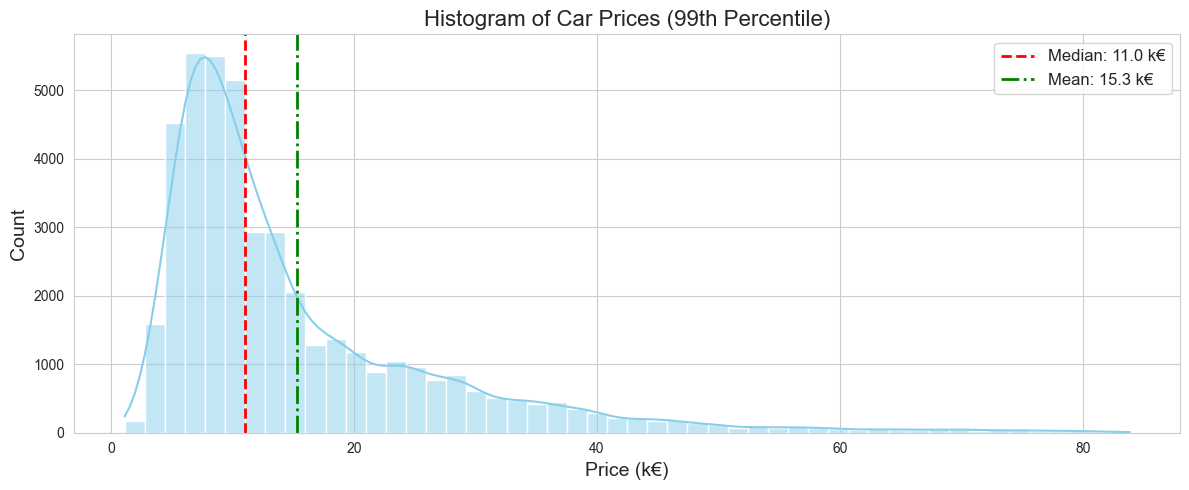

In [7]:

plt.figure(figsize=(12,5))

# Histogram + KDE
sns.histplot(subset['price_k'], bins=50, kde=True, color='skyblue')

# Median and mean lines
plt.axvline(median_price, color='red', linestyle='--', linewidth=2, label=f'Median: {median_price:.1f} k€')
plt.axvline(mean_price, color='green', linestyle='-.', linewidth=2, label=f'Mean: {mean_price:.1f} k€')

# Titles and labels
plt.title('Histogram of Car Prices (99th Percentile)', fontsize=16)
plt.xlabel('Price (k€)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


## 📊 Car Price Distribution Insights

Examining the histogram of car prices (capped at the 99th percentile), several patterns emerge:

- The majority of listings are **below the mean price**, suggesting that many cars are affordable for an average buyer.  
- The **highest concentration of listings occurs slightly below the median** (around 2 k€ less), indicating that the “typical” car available is modestly priced.  
- The **right-skewed distribution** reflects a small number of expensive cars pulling the average up, which is typical in used car markets.

**Key takeaway:**  
- While the median gives a good sense of a typical car price, it’s important to explore other factors—**brand, model, mileage, and age**—to fully understand affordability and market trends.


#### ⚠️ Outlier Detection for Mileage


In [8]:
# Rescale mileage to thousands of km
cars['mileage_k'] = cars['mileage'] / 1000

# Limit to 99th percentile to remove extreme outliers
mileage_limit = cars['mileage_k'].quantile(0.99)
subset_mileage = cars[cars['mileage_k'] <= mileage_limit]

# Calculate median and mean for the subset
median_mileage = subset_mileage['mileage_k'].median()
mean_mileage = subset_mileage['mileage_k'].mean()

# print values for reference
print(f"Median mileage (subset): {median_mileage:.1f} k km")
print(f"Mean mileage (subset): {mean_mileage:.1f} k km")
print(f"Number of cars with 0 km: {(cars['mileage']==0).sum()}")


Median mileage (subset): 60.1 k km
Mean mileage (subset): 69.7 k km
Number of cars with 0 km: 63


## 📊 Mileage Distribution (99th Percentile)

We visualize the distribution of car mileage to understand the market:

- **Focus:** Mileage is limited to the **99th percentile** to remove extreme outliers that distort the histogram.
- **Median mileage:** 60.1 k km (calculated after removing the top 1% of extreme values; shown as a red dashed line).
- **Mean mileage:** 69.7 k km (also based on the filtered data).
- **KDE curve:** Shows the overall shape of the mileage distribution.
- **Cars with 0 km:** 63 listings, likely representing new or unused vehicles, not considered outliers.

**Units:** Mileage is displayed in **thousands of kilometers (k km)** for readability.

**Insights to look for:**
- Which mileage ranges are most common
- How skewed the market is (mean > median suggests a right-skewed distribution, with a few high-mileage cars pulling the average up)
- How the distribution of mileage relates to price, car age, and brand


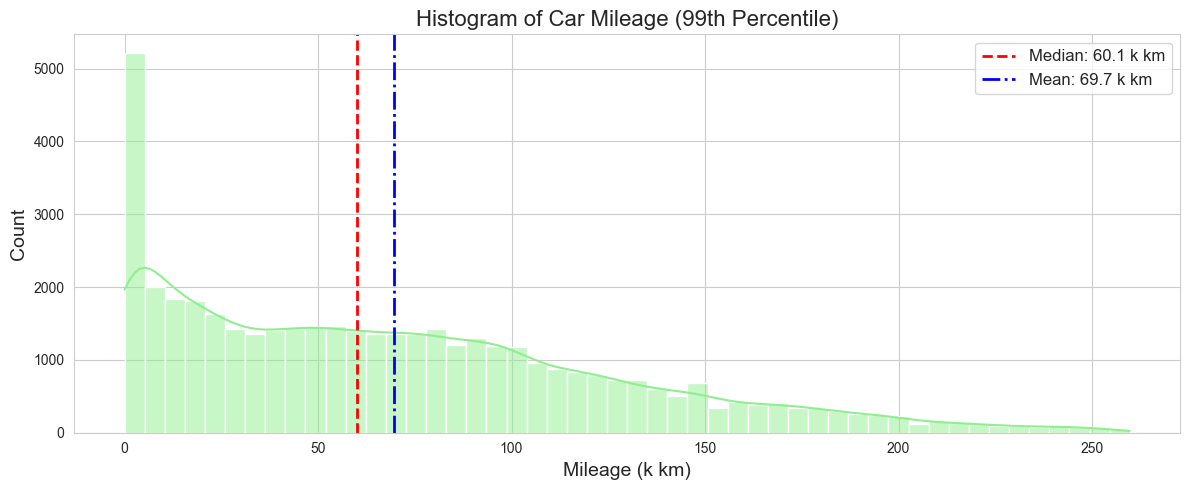

Mileage Statistics Summary:
Total cars analyzed: 43,822
Median mileage: 60.1 thousand km
Mean mileage: 69.7 thousand km
Difference: 9.6 thousand km
Mileage range: 0.0 - 259.7 thousand km


In [21]:
plt.figure(figsize=(12,5))

# Histogram + KDE
sns.histplot(subset_mileage['mileage_k'], bins=50, kde=True, color='lightgreen')

# Median and mean lines
plt.axvline(median_mileage, color='red', linestyle='--', linewidth=2, label=f'Median: {median_mileage:.1f} k km')
plt.axvline(mean_mileage, color='blue', linestyle='-.', linewidth=2, label=f'Mean: {mean_mileage:.1f} k km')

# Titles and labels
plt.title('Histogram of Car Mileage (99th Percentile)', fontsize=16)
plt.xlabel('Mileage (k km)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Mileage Statistics Summary:")
print("=" * 30)
print(f"Total cars analyzed: {len(subset_mileage):,}")
print(f"Median mileage: {median_mileage:.1f} thousand km")
print(f"Mean mileage: {mean_mileage:.1f} thousand km")
print(f"Difference: {mean_mileage - median_mileage:.1f} thousand km")
print(f"Mileage range: {subset_mileage['mileage_k'].min():.1f} - {subset_mileage['mileage_k'].max():.1f} thousand km")

## 📊 Car Mileage Distribution Insights

Examining the histogram of car mileage (capped at the 99th percentile), several patterns emerge:

- The majority of listings have **mileage below the mean** (69.7 k km), indicating most cars are relatively lightly used.  
- The **highest concentration of listings occurs around the median** (60.1 k km), showing what a “typical” used car has been driven.  
- A small number of cars have very high mileage, creating a **right-skewed distribution** similar to price.  
- **Cars with 0 km (63 listings)** are not considered outliers—they likely represent new cars or vehicles that were never driven.  

**Key takeaway:**  
- While the median gives a reliable sense of typical mileage, it’s important to consider other factors—**brand, model, age, and condition**—to fully understand how usage affects value and pricing trends.


#### ⚠️ Outlier Detection for HP


In [10]:
# Replace unrealistic horsepower (<30) with median by brand
cars.loc[cars['hp'] < 30, 'hp'] = cars.groupby('brand')['hp'].transform(lambda x: x.median())

# Limit to 99th percentile to remove extreme outliers
hp_limit = cars['hp'].quantile(0.99)
subset_hp = cars[cars['hp'] <= hp_limit]

# Calculate median and mean for the subset
median_hp = subset_hp['hp'].median()
mean_hp = subset_hp['hp'].mean()

# print values for reference
print(f"Median horsepower (subset): {median_hp:.0f} hp")
print(f"Mean horsepower (subset): {mean_hp:.0f} hp")


Median horsepower (subset): 116 hp
Mean horsepower (subset): 130 hp


## 📊 Horsepower (HP) Distribution (99th Percentile)

We visualize the distribution of car horsepower to understand the market:

- **Focus:** Horsepower is limited to the **99th percentile** to remove extreme outliers that distort the histogram.
- **Median horsepower:** 116 hp (calculated after removing the top 1% of extreme values; shown as a red dashed line).
- **Mean horsepower:** 130 hp (also based on the filtered data).
- **KDE curve:** Shows the overall shape of the horsepower distribution.

**Units:** Horsepower is displayed in **hp**.

**Insights to look for:**
- Which horsepower ranges are most common
- How skewed the market is (mean > median suggests a right-skewed distribution, with a few high-power cars pulling the average up)
- How horsepower relates to price, mileage, and car model


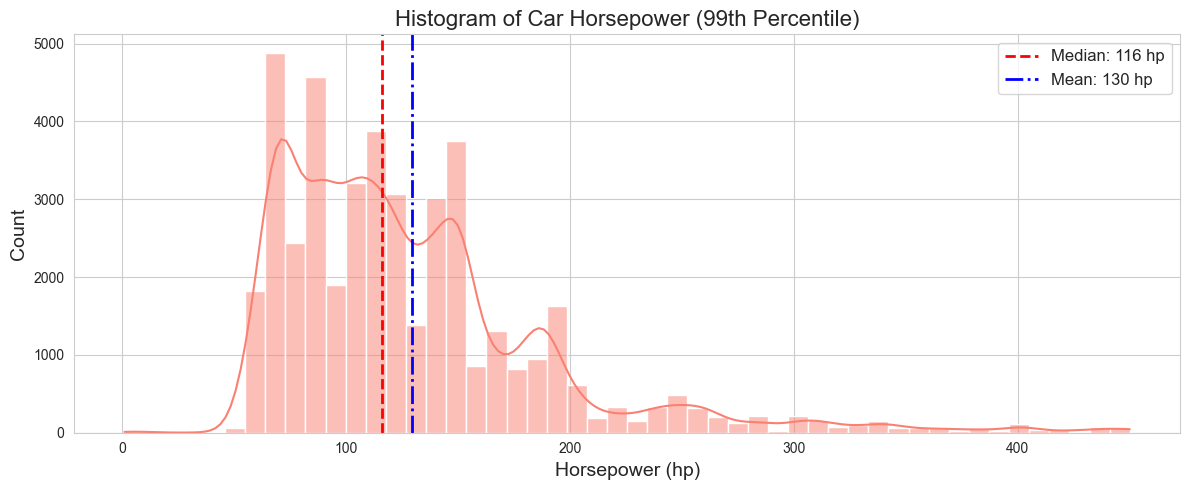

Horsepower Statistics Summary:
Total cars analyzed: 43,839
Median horsepower: 116 hp
Mean horsepower: 130 hp
Difference: 14 hp
Horsepower range: 1 - 450 hp


In [22]:
plt.figure(figsize=(12,5))

# Histogram + KDE
sns.histplot(subset_hp['hp'], bins=50, kde=True, color='salmon')

# Median and mean lines
plt.axvline(median_hp, color='red', linestyle='--', linewidth=2, label=f'Median: {median_hp:.0f} hp')
plt.axvline(mean_hp, color='blue', linestyle='-.', linewidth=2, label=f'Mean: {mean_hp:.0f} hp')

# Titles and labels
plt.title('Histogram of Car Horsepower (99th Percentile)', fontsize=16)
plt.xlabel('Horsepower (hp)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
# Print summary statistics
print("Horsepower Statistics Summary:")
print("=" * 30)
print(f"Total cars analyzed: {len(subset_hp):,}")
print(f"Median horsepower: {median_hp:.0f} hp")
print(f"Mean horsepower: {mean_hp:.0f} hp")
print(f"Difference: {mean_hp - median_hp:.0f} hp")
print(f"Horsepower range: {subset_hp['hp'].min():.0f} - {subset_hp['hp'].max():.0f} hp")


## 📊 Car Horsepower (HP) Insights

Examining the histogram of car horsepower, several patterns emerge:

- Most cars have **horsepower below the median (116 hp)**, showing that mid-performance vehicles dominate the market.  
- The **difference between the median and mean is small** (median: 116 hp, mean: 130 hp; difference: 14 hp), indicating that extreme high-performance cars only slightly affect the average.  
- The majority of cars fall in the **50–200 hp range**, with a smaller secondary peak around **250 hp**, likely representing performance or luxury models.  
- The distribution is **right-skewed**, but less pronounced than price or mileage.

**Key takeaways and next steps:**  
- The **median is the most reliable indicator** of typical car performance.  
- High-performance outliers may warrant **separate analysis**, especially when studying price effects or segmenting the market.  
- Further investigation is needed to see **which brands and models contribute to the higher horsepower range** and how this correlates with price.  
- Combining horsepower insights with **price and mileage analysis** provides a fuller understanding of market trends and is valuable for building predictive models or recommending cars to buyers.


## ⛽ Car Listings by Fuel Type

We visualize the distribution of cars by fuel type to understand the German used car market:

- **Total cars analyzed:** 44,265 vehicles
- **Dominant fuel types:** Gasoline (61.9%) and Diesel (33.3%) together represent **95.2%** of all listings
- **Alternative fuels:** Electric, Hybrid, and other alternatives make up just **4.8%** of the market
- **Emerging technologies:** Pure electric vehicles (**1.7%**) already outnumber other alternative fuel options combined

**Purpose of this analysis:**
- Understand the fuel type distribution in the German used car market
- Identify which fuel types dominate the market
- Recognize the current state of alternative fuel adoption
- Provide insights for pricing strategy and inventory management

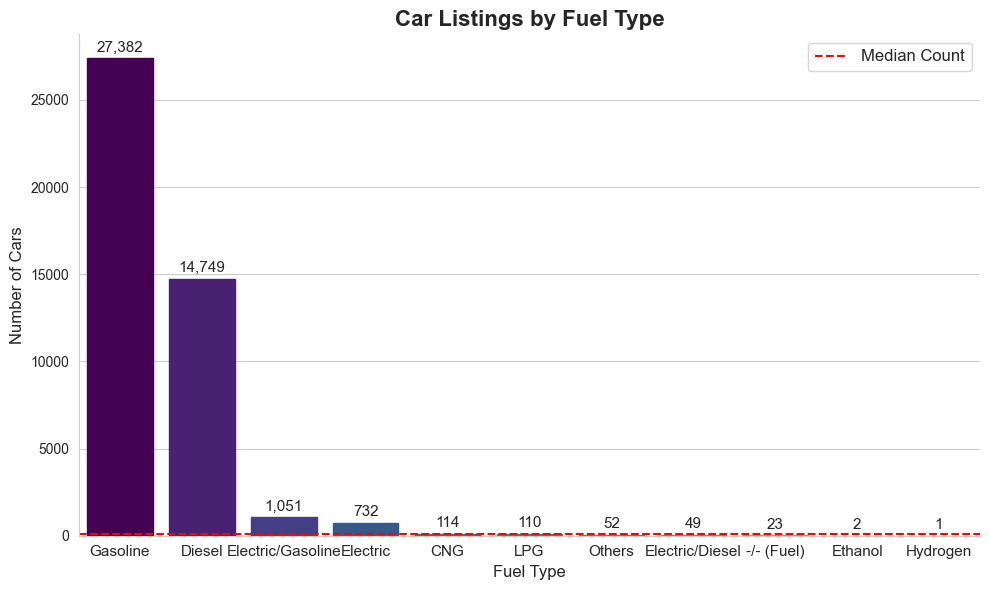

Summary: Car Listings by Fuel Type
Gasoline     27,382 cars (61.9%)
Diesel       14,749 cars (33.3%)
Electric/Gasoline  1,051 cars (2.4%)
Electric        732 cars (1.7%)
CNG             114 cars (0.3%)
LPG             110 cars (0.2%)
Others           52 cars (0.1%)
Electric/Diesel     49 cars (0.1%)
-/- (Fuel)       23 cars (0.1%)
Ethanol           2 cars (0.0%)
Hydrogen          1 cars (0.0%)


In [12]:
# Count cars by fuel type

fuel_counts = cars['fuel'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=fuel_counts.index,
    y=fuel_counts.values
)

# Apply consistent color gradient
for i, bar in enumerate(ax.patches):
    bar.set_color(plt.cm.viridis(i / len(ax.patches)))

# Add median line for context
median_count = fuel_counts.median()
plt.axhline(median_count, color='red', linestyle='--', label='Median Count')

# Add value labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 200,
            f'{int(height):,}', ha='center', va='bottom', fontsize=11)

# Titles and labels
plt.title('Car Listings by Fuel Type', fontsize=16, fontweight='bold')
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)
plt.xticks(fontsize=11)
plt.legend(fontsize=12)

# Clean up the layout
sns.despine()
plt.tight_layout()
plt.show()

# -------------------------------
# summary statistics
# -------------------------------
print("Summary: Car Listings by Fuel Type")
print("=" * 35)
total_cars = len(cars)
for fuel_type, count in fuel_counts.items():
    percentage = (count / total_cars) * 100
    print(f"{fuel_type:<12} {count:>6,} cars ({percentage:.1f}%)")

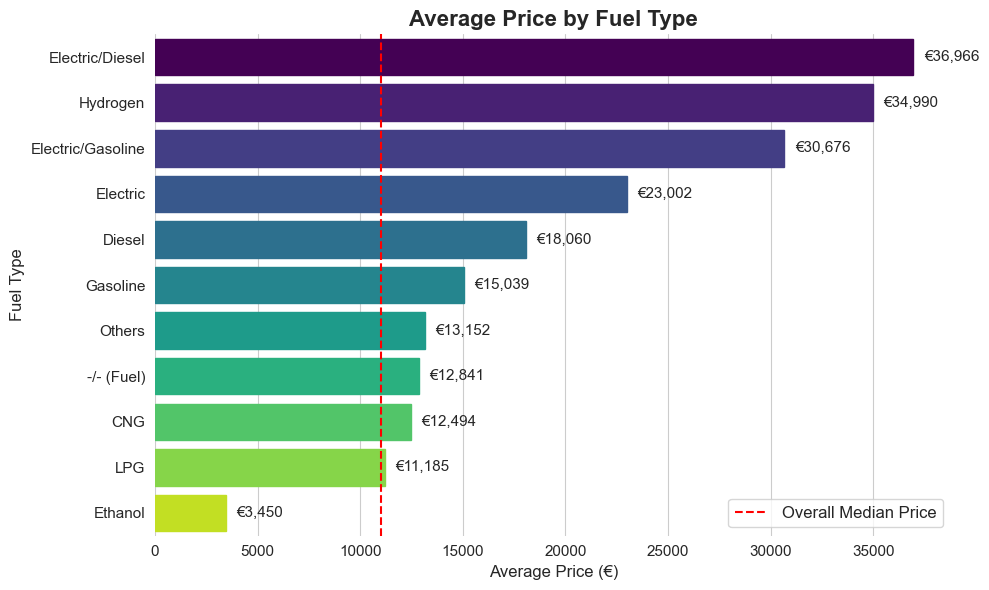

Summary: Average Price by Fuel Type
Electric/Diesel €36,966.45
Hydrogen     €34,990.00
Electric/Gasoline €30,676.91
Electric     €23,002.62
Diesel       €18,060.85
Gasoline     €15,039.09
Others       €13,152.96
-/- (Fuel)   €12,841.39
CNG          €12,494.93
LPG          €11,185.77
Ethanol      €3,450.00


In [13]:
# Calculate average price per fuel type
avg_price_fuel = cars.groupby('fuel')['price'].mean().sort_values(ascending=False)

# Create horizontal bar plot

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=avg_price_fuel.values,
    y=avg_price_fuel.index,
    orient='h'
)

# Apply consistent gradient color (from cheap to expensive)
for i, bar in enumerate(ax.patches):
    bar.set_color(plt.cm.viridis(i / len(ax.patches)))

# Add median line for context
median_price = cars['price'].median()
plt.axvline(median_price, color='red', linestyle='--', label='Overall Median Price')

# Add value labels next to each bar
for bar in ax.patches:
    width = bar.get_width()
    ax.text(width + 500, bar.get_y() + bar.get_height()/2.,
            f'€{int(width):,}', ha='left', va='center', fontsize=11)

# Titles and labels
plt.title('Average Price by Fuel Type', fontsize=16, fontweight='bold')
plt.xlabel('Average Price (€)', fontsize=12)
plt.ylabel('Fuel Type', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=12)

# Clean up the layout
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Print summary statistics

print("Summary: Average Price by Fuel Type")
print("=" * 40)
for fuel_type, price in avg_price_fuel.items():
    print(f"{fuel_type:<12} €{price:,.2f}")


## 💰 Interpretation: Average Price by Fuel Type

The horizontal bar chart and summary statistics show the **average price of cars by fuel type** in the German used car market. Key insights include:

- **Highest-priced fuel types:**
  - **Electric/Diesel (€36,966)** and **Hydrogen (€34,990)** vehicles command the highest average prices, reflecting their **emerging technology status** and relative rarity in the market.
  - **Electric/Gasoline (€30,677)** and pure **Electric (€23,003)** vehicles are also priced above the market median, indicating **strong demand and premium for electric mobility**.

- **Mid-range fuel types:**
  - Traditional fuels like **Diesel (€18,061)** and **Gasoline (€15,039)** are priced significantly lower than alternative fuel vehicles, reflecting their **larger market availability** and **lower novelty value**.

- **Lower-priced or niche fuel types:**
  - Fuel types such as **CNG (€12,495), LPG (€11,186), Ethanol (€3,450)**, and **Others (€13,153)** are the least expensive, often due to **limited availability, niche adoption, or older models**.
  - Vehicles with missing fuel data (`-/-`) average **€12,841**, suggesting they may include older or less-standardized listings.

**Overall insights:**
- **Alternative and emerging fuel types** are sold at a significant premium compared to conventional fuels.
- The **market values innovation and scarcity**, particularly for electric and hydrogen technologies.
- For **pricing strategy and inventory management**, sellers could **highlight alternative fuel vehicles** as high-value assets, while **Gasoline and Diesel vehicles** remain competitive in volume-driven segments.


## 🚀 Step 5: Feature Engineering

We create new features to enrich the dataset:  
- **car_age**: How old the car is.  
- **price_per_hp**: Price per unit of horsepower.  
- **price_per_km**: Price per kilometer driven.  
- **price_category**: Categorizes cars into Low, Medium, High, and Luxury based on price.


In [19]:
from datetime import datetime

# Calculate car age
current_year = datetime.now().year
cars['car_age'] = current_year - cars['year']

# Calculate price per horsepower
cars['price_per_hp'] = cars['price'] / cars['hp']

# Calculate price per kilometer (NaN for zero mileage to avoid inflated values)
cars['price_per_km'] = cars['price'] / cars['mileage'].replace(0, np.nan)

# Categorize price
bins = [0, 10000, 20000, 40000, 1000000]
labels = ['Low', 'Medium', 'High', 'Luxury']
cars['price_category'] = pd.cut(cars['price'], bins=bins, labels=labels)

## 🚗 Analysis by Brand

We focus on the **top 12 car brands** by number of listings to understand how brand affects key car features.  

- **Numeric features compared:**  
  - Mileage (`mileage`)  
  - Horsepower (`hp`)  
  - Car age (`car_age`)  
  - Price per km (`price_per_km`)  
  - Price per horsepower (`price_per_hp`)  

**Objective:**  
- Identify which brands dominate the market in terms of listings.  
- Compare average characteristics of cars by brand.  
- Spot trends, such as which brands tend to have lower mileage, higher performance, or more expensive cars per km/HP.


In [15]:
# Filter top 12 brands by number of listings
top_brands = cars['brand'].value_counts().nlargest(12).index
cars_top = cars[cars['brand'].isin(top_brands)]

# Numeric features for comparison
numeric_cols = ['mileage','hp','car_age','price_per_km','price_per_hp']


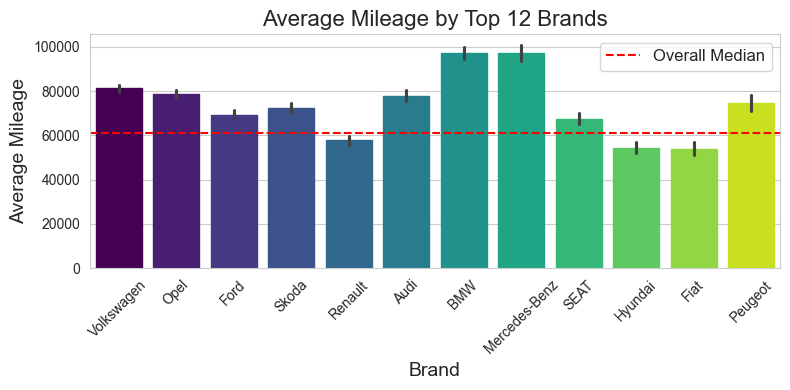

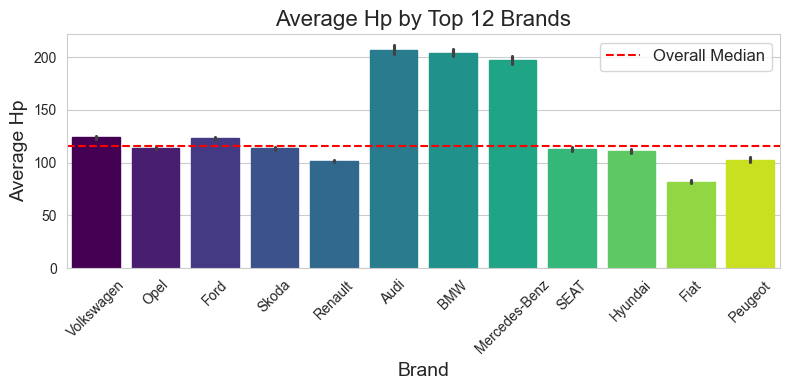

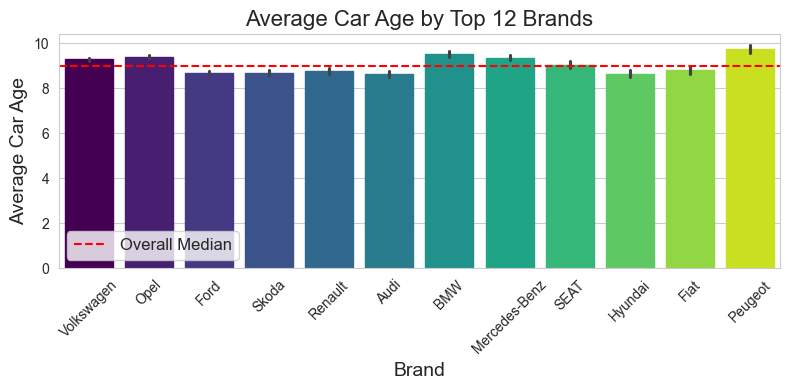

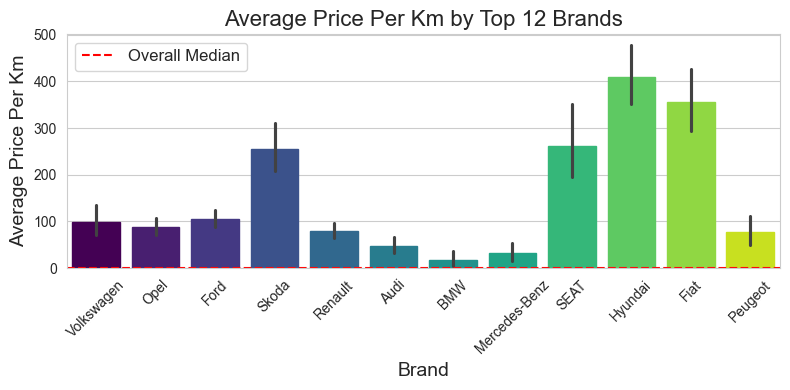

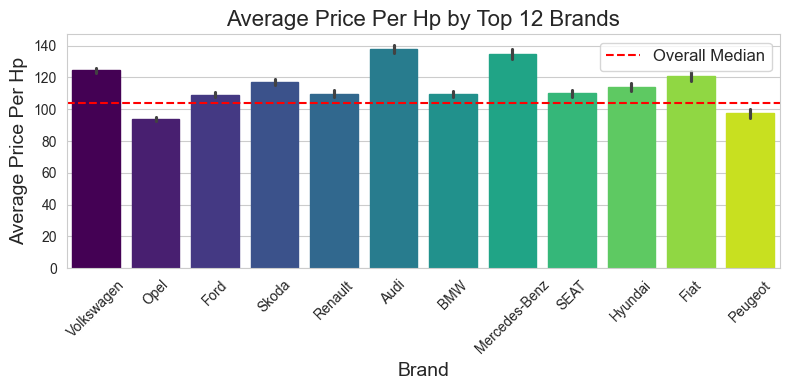

In [16]:

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    ax = sns.barplot(
        data=cars_top, 
        x='brand', 
        y=col, 
        order=top_brands, 
        estimator=np.mean
    )
    
    # consistent color gradient
    for i, bar in enumerate(ax.patches):
        bar.set_color(plt.cm.viridis(i / len(ax.patches)))
    
    # median line for context
    plt.axhline(cars[col].median(), color='red', linestyle='--', label='Overall Median')
    
    # Titles and labels
    plt.title(f"Average {col.replace('_',' ').title()} by Top 12 Brands", fontsize=16)
    plt.xlabel("Brand", fontsize=14)
    plt.ylabel(f"Average {col.replace('_',' ').title()}", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


## 🚗 Top Brand Insights

From the plots:

- **Mileage:** Some brands tend to have lower average mileage, suggesting either newer listings or less usage.  
- **Horsepower:** Certain brands have higher performance cars on average.  
- **Car age:** Brands with older cars may have more used vehicles or legacy models.  
- **Price per km / per HP:** These metrics highlight the relative value for each brand — some brands are more expensive for the same mileage or performance.  

**Analytical takeaways:**  
- Buyers looking for performance might focus on high-hp brands.  
- Brands with lower mileage may command higher prices.  
- Price-per-km or price-per-HP analysis can guide **pricing models** and **market segmentation**.  
- Median lines help compare each brand to the overall market trend.


## 📊 Step 7: Summary Statistics for Top Brands

To complement the previous visual analysis, we calculate **summary statistics** for the top 12 brands:

- **Number of listings:** How many cars are available per brand  
- **Median and average price:** Typical pricing and average price trends  
- **Price standard deviation:** Variability in pricing within each brand  
- **Median horsepower and mileage:** Typical performance and usage for each brand  

**Purpose:**  
This table provides a **high-level overview** of each brand’s market presence, pricing, and vehicle characteristics. It helps us quickly identify which brands are more expensive, higher-performing, or have lower mileage compared to the market.


In [17]:
# Summary statistics for top brands
summary_top_brands = cars_top.groupby('brand').agg(
    num_listings        = ('price', 'count'),      
    median_price        = ('price', 'median'),     
    average_price       = ('price', 'mean'),       
    price_std_dev       = ('price', 'std'),        
    median_hp           = ('hp', 'median'),        
    median_mileage      = ('mileage', 'median')    
)

# Round values for readability
summary_top_brands = summary_top_brands.round(2)

# summary table sorted by median price
display(summary_top_brands.sort_values('median_price', ascending=False))


,num_listings,median_price,average_price,price_std_dev,median_hp,median_mileage
brand,,,,,,
Audi,2549,23990.0,29786.27,23675.42,184.0,63000.0
Mercedes-Benz,2277,21160.0,28314.59,30527.87,170.0,80000.0
BMW,2370,17900.0,23354.92,17054.08,184.0,89000.0
Volkswagen,6703,11499.0,15968.52,11955.16,116.0,70000.0
Ford,4276,10745.0,13746.19,9047.27,120.0,56418.0
Skoda,2752,10485.0,13667.83,9127.97,105.0,63708.5
Hyundai,1745,9980.0,12956.14,8867.84,101.0,48950.0
SEAT,1831,9600.0,12763.12,8323.94,105.0,61532.0
Renault,2695,8990.0,11249.10,7491.81,90.0,45689.0


## 📊 Insights from Top Brand Summary

From the summary table:

- **Brand with highest median price:** Shows the premium segment in the market.  
- **Brands with lowest median mileage:** Suggests newer or less used cars.  
- **Brands with highest horsepower:** Typically more performance-oriented cars.  
- **Price variability (std deviation):** Highlights brands with both cheap and expensive listings.  

**Analytical takeaways:**  
- This summary allows a data analyst to quickly identify **market trends, brand positioning, and pricing strategies**.  
- High median price combined with low median mileage could indicate a strong resale value.  
- Brands with high price variability may require separate consideration when building predictive models or analyzing demand.


## 📊 Step 8: Visualizing Summary Statistics by Brand

To complement the summary table, we visualize key metrics for the top brands:

- **Number of Listings** – Shows which brands dominate the market in terms of available cars.  
- **Median Price** – Highlights typical pricing per brand.  
- **Average Price** – Shows mean pricing and helps identify brands with expensive outliers.  
- **Price Standard Deviation** – Indicates variability in listing prices.  
- **Median Horsepower** – Represents typical engine strength per brand.  
- **Median Mileage** – Typical distance driven, giving insight into usage.  

**Purpose:**  
- Provide a visual overview for easier comparison across brands.  
- Identify trends, outliers, and patterns that are harder to spot in a table.


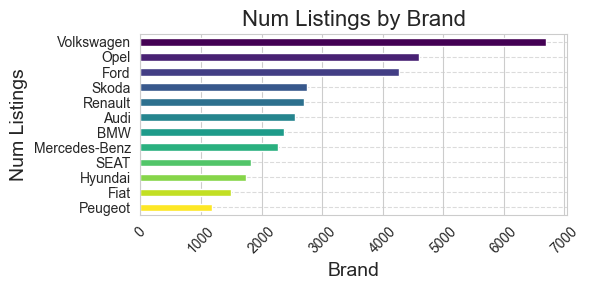

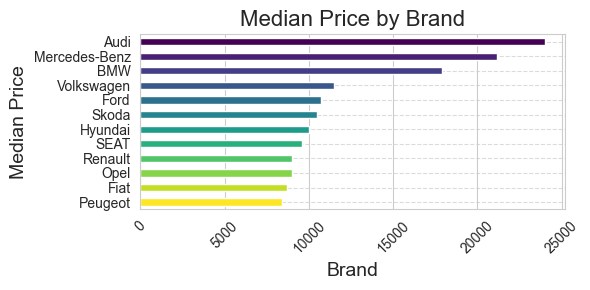

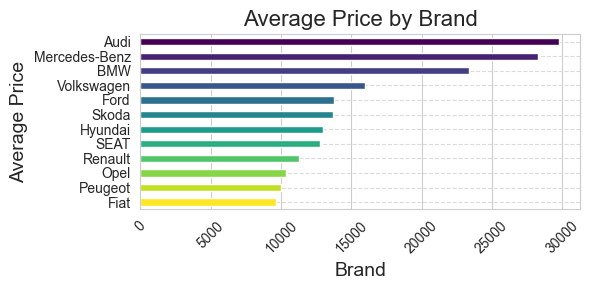

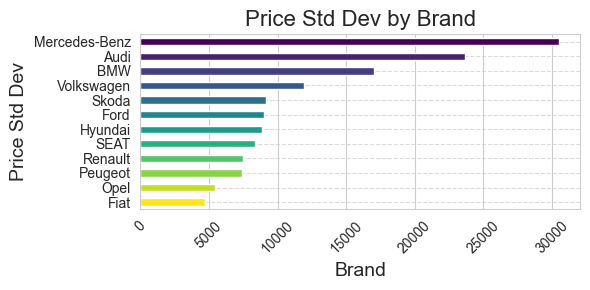

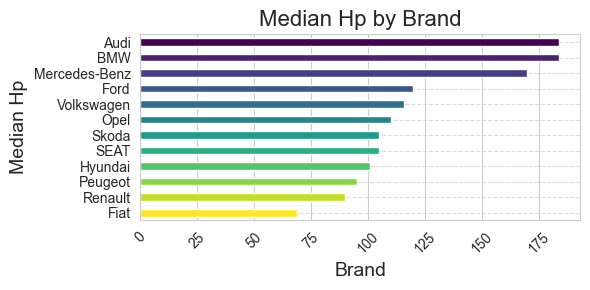

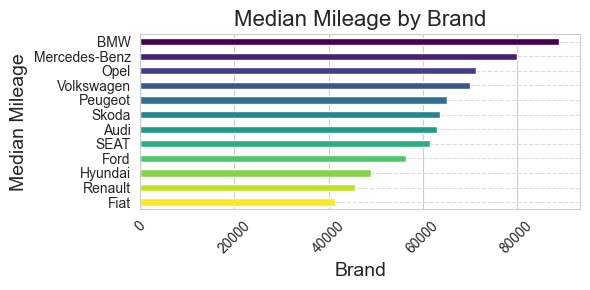


Summary Statistics: Num Listings by Brand
Volkswagen      6,703.00
Opel            4,599.00
Ford            4,276.00
Skoda           2,752.00
Renault         2,695.00
Audi            2,549.00
BMW             2,370.00
Mercedes-Benz   2,277.00
SEAT            1,831.00
Hyundai         1,745.00
Fiat            1,494.00
Peugeot         1,178.00

Summary Statistics: Median Price by Brand
Audi            23,990.00
Mercedes-Benz   21,160.00
BMW             17,900.00
Volkswagen      11,499.00
Ford            10,745.00
Skoda           10,485.00
Hyundai         9,980.00
SEAT            9,600.00
Renault         8,990.00
Opel            8,980.00
Fiat            8,700.00
Peugeot         8,395.00

Summary Statistics: Average Price by Brand
Audi            29,786.27
Mercedes-Benz   28,314.59
BMW             23,354.92
Volkswagen      15,968.52
Ford            13,746.19
Skoda           13,667.83
Hyundai         12,956.14
SEAT            12,763.12
Renault         11,249.10
Opel            10,388.01
Peug

In [20]:

for col in summary_top_brands.columns:
    plt.figure(figsize=(6,3))
    
    # Sort values for clarity
    sorted_values = summary_top_brands[col].sort_values(ascending=False)
    
    # Plot bar chart with a consistent color gradient
    ax = sorted_values.plot(
        kind='barh', 
        color=plt.cm.viridis(np.linspace(0,1,len(sorted_values))),
    )
    
    # Titles and labels
    plt.title(f"{col.replace('_',' ').title()} by Brand", fontsize=16)
    plt.xlabel("Brand", fontsize=14)
    plt.ylabel(f"{col.replace('_',' ').title()}", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

for col in summary_top_brands.columns:
    # Sort values for plotting
    sorted_values = summary_top_brands[col].sort_values(ascending=False)
    
    # Print statistics
    print(f"\nSummary Statistics: {col.replace('_',' ').title()} by Brand")
    print("="*50)
    for brand, value in sorted_values.items():
        print(f"{brand:<15} {value:,.2f}")


## 🚗 Insights from Brand Visualizations

From the bar charts:

- **Number of Listings:** Some brands dominate in sheer volume, indicating higher market availability.  
- **Median vs Average Price:** Brands with large gaps between median and mean have high-priced outliers.  
- **Price Standard Deviation:** A high value suggests brands with both budget and premium listings.  
- **Median Horsepower:** Shows which brands are performance-oriented.  
- **Median Mileage:** Brands with lower median mileage likely have newer or less-used cars.  

**Takeaways for a data analyst:**  
- Visual comparison quickly identifies premium vs budget brands.  
- Useful for **pricing models, market segmentation, and demand analysis**.  
- Helps in deciding which brands to focus on for further analysis, predictive modeling, or insights reporting.


# 🚗 Car Market Insights

The following analysis summarizes key trends in **resale value, price drivers, and popularity** of used cars based on brand, mileage, horsepower, and fuel type.

---

## 1️⃣ 💰 Resale Value
Resale value can be approximated using **median price relative to mileage**.  

**Key observations (see chart above for price vs mileage):**
- **High-value brands:** Audi (€23,990, 63k km), Mercedes-Benz (€21,160, 80k km), BMW (€17,900, 89k km)
- **Low-value brands:** Fiat (€8,700, 41k km), Peugeot (€8,395, 65k km)

**Insight:**  
Luxury brands **retain value better** over time, even with higher mileage. Mass-market brands depreciate faster, though Volkswagen shows decent retention for a mid-range brand.

---

## 2️⃣ 📊 Price Drivers
Price is influenced by **brand, fuel type, horsepower, and mileage**:

- **Mileage:** Generally, higher mileage → lower price, but **brand is more significant** for luxury cars.  
  - Example: BMW (89k km → €17,900) vs Fiat (41k km → €8,700)

- **Fuel Type:** Premium fuels command higher prices (see chart above):  
  - Electric/Diesel €36,966, Hydrogen €34,990, Electric/Gasoline €30,677  
  - Gasoline €15,039, Diesel €18,061

- **Horsepower:** Higher hp → higher price  
  - Audi/BMW (184 hp → €23k–€29k), Fiat (69 hp → €8.7k)

**Conclusion:** Brand, fuel type, and horsepower are **primary price drivers**, while mileage has less impact for luxury cars.

---

## 3️⃣ 🔥 Popularity & Price Range
Popularity is measured by **number of listings** (see listings chart):

- **Top-listed brands:** Volkswagen (6,703), Opel (4,599), Ford (4,276)  
- **Median prices of popular cars:** VW €11,499, Opel €8,980, Ford €10,745

**Insight:**  
Most popular cars are **affordable or mid-range (~€8k–€12k)**. Luxury brands have fewer listings but higher resale value.

---

## ✅ Summary Table

| Question                  | Key Findings |
|----------------------------|--------------|
| 💰 Resale Value            | Audi, Mercedes-Benz, BMW retain value best; Fiat & Peugeot weaker |
| 📊 Price Drivers           | Brand, fuel type, horsepower drive price; mileage less critical for luxury cars |
| 🔥 Popularity & Price Range| Popular cars: VW, Opel, Ford; price ~€8k–€12k |

---

💡 **Key Takeaways:**  
- **Luxury brands:** High price, high mileage, fewer listings  
- **Mass-market brands:** Affordable, high volume, moderate resale value  
- **EVs & hybrids:** Premium niche, high price, low volume
